In [1]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-05-30 23:50:09.345055: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 23:50:09.568594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 23:50:09.568644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 23:50:09.600017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 23:50:09.674628: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# generators - for processing large data into batches

In [3]:
# training generator 
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

# validation generator 
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.


2024-05-30 23:50:40.013417: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 23:50:40.158187: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 23:50:40.158233: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 23:50:40.161173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 23:50:40.161211: I external/local_xla/xla/stream_executor

Found 5000 files belonging to 2 classes.


In [4]:
#Normalize 
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

In [5]:
# creating Cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2024-05-30 23:50:53.049440: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-30 23:50:57.497624: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f88ac10ea20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-30 23:50:57.497684: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-05-30 23:50:57.548038: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1717093257.680003     458 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-05-30 23:51:00.108978: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 448.28MiB with freed_by_count=0. The c

625/625 [==============================] - 84s 112ms/step - loss: 1.1539 - accuracy: 0.5688 - val_loss: 0.6756 - val_accuracy: 0.5446
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6610 - accuracy: 0.6352 - val_loss: 0.5931 - val_accuracy: 0.7114
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5920 - accuracy: 0.6933 - val_loss: 0.6123 - val_accuracy: 0.6658
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5662 - accuracy: 0.7118 - val_loss: 0.5273 - val_accuracy: 0.7514
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5295 - accuracy: 0.7448 - val_loss: 0.6374 - val_accuracy: 0.6540
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5121 - accuracy: 0.7584 - val_loss: 0.4985 - val_accuracy: 0.7738
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5039 - accuracy: 0.7617 - val_loss: 0.6231 - val_accuracy: 0.6

2024-05-31 00:01:38.311492: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 190.97MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 [==============================] - 65s 104ms/step - loss: 0.4401 - accuracy: 0.8076 - val_loss: 0.4864 - val_accuracy: 0.7810


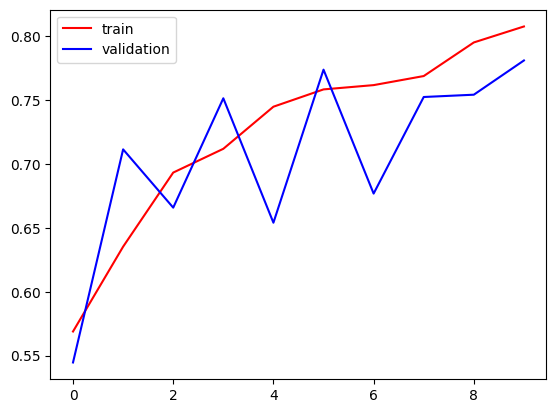

In [9]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

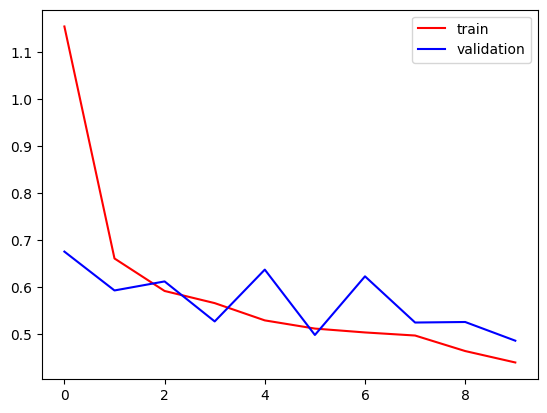

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
# Ways to reduce overfittng

# Add more data 
# data Augmentation
# L1/L2 regularizer
# Dropout
# batch norm
# Reduce Complexity

In [35]:
import cv2

In [46]:
test_img1 = cv2.imread('cat.jpg')
test_img2 = cv2.imread('dog.jpg')

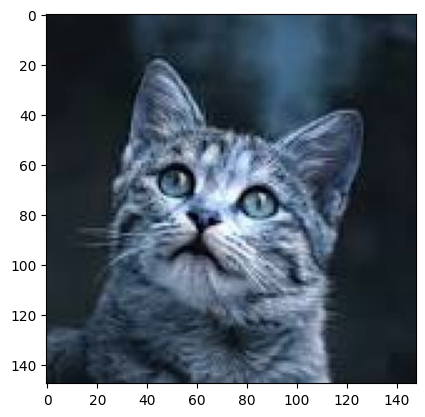

In [37]:
plt.imshow(test_img1)

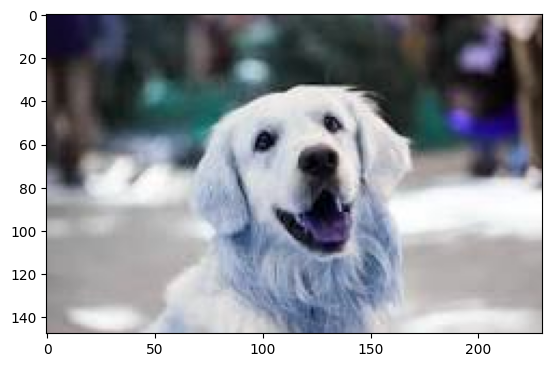

In [47]:
plt.imshow(test_img2)

In [38]:
test_img1.shape

(148, 148, 3)

In [40]:
test_img1= cv2.resize(test_img1,(256,256))


In [41]:
test_input1 = test_img1.reshape((1,256,256,3))


In [42]:
model.predict(test_input1)

1/1 [==============================] - 0s 19ms/step


array([[0.21409148]], dtype=float32)